## Load Dataset

100%|██████████| 2.75G/2.75G [01:22<00:00, 33.3MB/s]


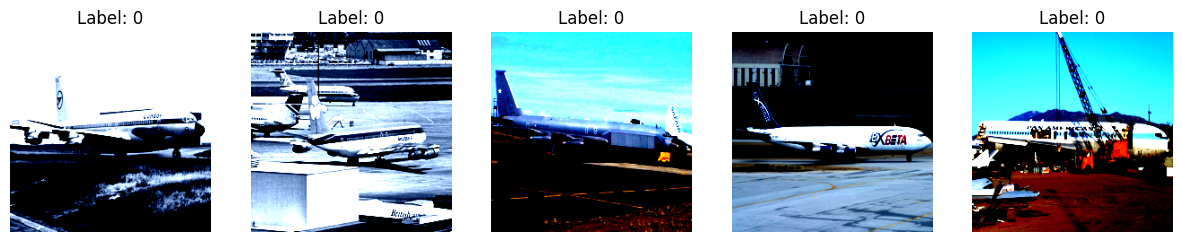

In [2]:
from torchvision.datasets import FGVCAircraft
import torchvision.transforms as transforms
import matplotlib.pyplot as plt

# Create a custom transform to remove the copyright banner
class RemoveCopyrightBanner(object):
    def __call__(self, img):
        # Get the width and height of the image
        width, height = img.size
        # Crop the image to remove the bottom 20 pixels (the copyright banner)
        return img.crop((0, 0, width, height - 20))

# Define transformation to convert images to tensor
transform = transforms.Compose([
    RemoveCopyrightBanner(),  # Remove the copyright banner first
    transforms.Resize((224, 224)),  # Then apply other transforms as needed
    transforms.ToTensor(),
    transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225])
])

# Create the FGVC Aircraft dataset instance
dataset = FGVCAircraft(
    root='./data',
    split='trainval',              # Options: 'train', 'val', 'trainval', 'test'
    annotation_level='variant',    # Options: 'variant', 'family', 'manufacturer'
    transform=transform,
    download=True
)

# Function to show images
def show_images(dataset, num_images=5):
    fig, axes = plt.subplots(1, num_images, figsize=(15, 5))
    for i in range(num_images):
        image, label = dataset[i]
        image = image.permute(1, 2, 0)  # Convert from CxHxW to HxWxC
        axes[i].imshow(image)
        axes[i].set_title(f'Label: {label}')
        axes[i].axis('off')
    plt.show()

# Show a few images from the dataset
show_images(dataset, num_images=5)